### https://github.com/krishnaik06/Feature-Engineering-Live-sessions/blob/master/Outliers.ipynb

## Discussion Related with outliers and Impact on Machine Learning !!!

### Which ML model are sensitive to outliers?

1. Naive Bayes Classifier --- Not sensitive to outliers
2. SVM --- Not sensitive to outliers
3. Linear Regression --- Sensitive to outliers
4. Logistic Regression --- Sensitive to outliers
5. Decision Tree Regression (or) classifier --- Not sensitive to outliers
6. Ensemble(Random Forest, XG, GB) --- Not sensitive to outliers
7. KNN --- Not Sensitive to outliers
8. K-Means & Hierarchial clustering  --- Sensitive to outliers
9. PCA  --- sensitive to outliers
10. Neural Network --- sensitive to outliers
11. DBScan  --- Sensitive to outliers

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('titanic.csv')

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
df.isnull().sum().sum()

866

In [59]:
import seaborn as sns

/home/vinoth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

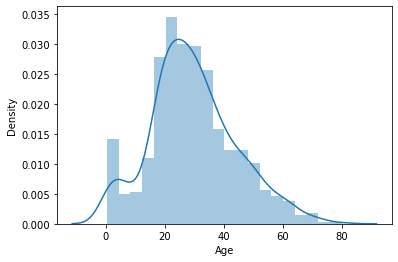

In [60]:
sns.distplot(df['Age'].dropna())

/home/vinoth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

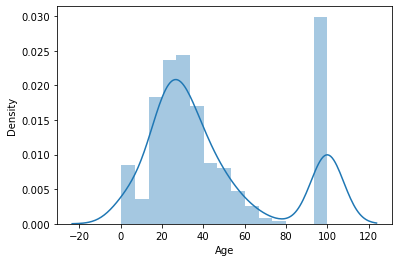

In [61]:
sns.distplot(df['Age'].fillna(100))

### Gaussian Distribution

Text(0, 0.5, 'No of passengers')

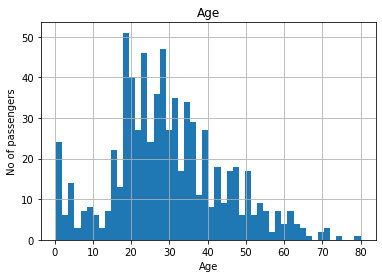

In [62]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel("No of passengers")

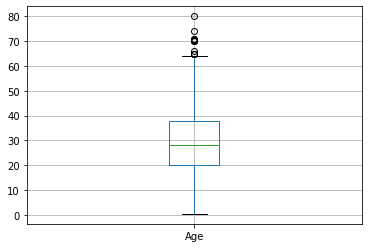

In [63]:
figure=df.boxplot(column='Age')

In [64]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

##### Assuming Age follows A Gaussian distribution, we will calculate oundaries which differenciates the outliers

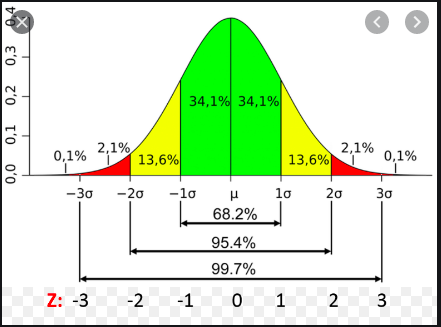

#### If The Data Is Normally Distributed We use this. Age is normally distributed

In [65]:
# Center point(0) in gaussian distribution is mean
upper_age_boundary = df['Age'].mean()+ 3*df['Age'].std()
lower_age_boundary = df['Age'].mean()- 3*df['Age'].std()
print(lower_age_boundary)
print(upper_age_boundary)
print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


In [66]:
df.Age.quantile(0.75)

38.0

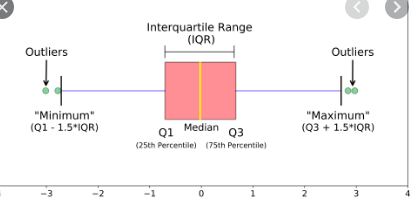

In [67]:
# Lets calculate Inter Quartile Range(IQR) to calculate boundary = 75% quantile - 25% quantile

IQR = df.Age.quantile(0.75)-df.Age.quantile(0.25)
IQR

17.875

In [68]:
lower_bridge = df.Age.quantile(0.25)-(1.5*IQR)
print(lower_bridge)
upper_bridge = df.Age.quantile(0.75)+(1.5*IQR)
print(upper_bridge)

-6.6875
64.8125


In [69]:
# Extreme outliers 
lower_bridge = df.Age.quantile(0.25)-(3*IQR)
print(lower_bridge)
upper_bridge = df.Age.quantile(0.75)+(3*IQR)
print(upper_bridge)

-33.5
91.625


#### Features is skewed

Text(0, 0.5, 'No of passengers')

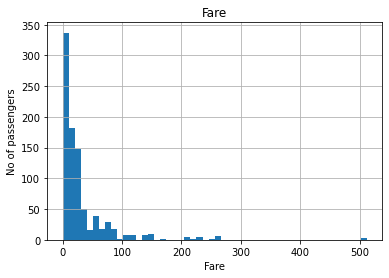

In [70]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel("No of passengers")

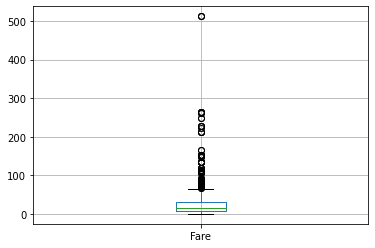

In [71]:
figure=df.boxplot(column='Fare')

In [72]:
# Lets calculate Inter Quartile Range(IQR) to calculate boundary = 75% quantile - 25% quantile

IQR = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
IQR

23.0896

In [73]:
lower_bridge = df.Fare.quantile(0.25)-(1.5*IQR)
print(lower_bridge)
upper_bridge = df.Fare.quantile(0.75)+(1.5*IQR)
print(upper_bridge)

-26.724
65.6344


### If the data is skewed, we need to select extreme outliers

In [74]:
# Extreme outliers 
lower_bridge = df.Fare.quantile(0.25)-(3*IQR)
print(lower_bridge)
upper_bridge = df.Fare.quantile(0.75)+(3*IQR)
print(upper_bridge)

-61.358399999999996
100.2688


### Handling outliers

In [75]:
data = df.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
data.loc[df['Age']>upper_age_boundary, 'Age']=73

In [77]:
df.loc[df['Age'] > upper_age_boundary] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [78]:
data.loc[data['PassengerId'] == 631] # Age>73 is replace with 73

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,73.0,0,0,27042,30.0,A23,S


In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'], test_size=0.3)

#### Applying Logistic Regression which is sensitive to outliers

In [80]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

In [81]:
print('type(y_pred) : ', type(y_pred))
print('type(y_pred1) : ', type(y_pred1))
print('type(y_pred1[:1]) : ', type(y_pred1[:1]))

type(y_pred) :  <class 'numpy.ndarray'>
type(y_pred1) :  <class 'numpy.ndarray'>
type(y_pred1[:1]) :  <class 'numpy.ndarray'>


In [82]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("ROC score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))
print(classification_report(y_test,y_pred))

Accuracy score: 0.7164179104477612
ROC score: 0.6732007575757576
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       180
           1       0.71      0.23      0.34        88

    accuracy                           0.72       268
   macro avg       0.72      0.59      0.58       268
weighted avg       0.72      0.72      0.66       268



#### Applying Random Forest Classifier which is insensitive to outliers - accuracy will be better compared to Logistic. It can also be improved by applying hyperparameter tuning

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

In [84]:
from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("ROC score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))
print(classification_report(y_test,y_pred))

Accuracy score: 0.7126865671641791
ROC score: 0.7429608585858587
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       180
           1       0.56      0.61      0.58        88

    accuracy                           0.71       268
   macro avg       0.68      0.69      0.68       268
weighted avg       0.72      0.71      0.72       268

